In [1]:
from rdkit import Chem

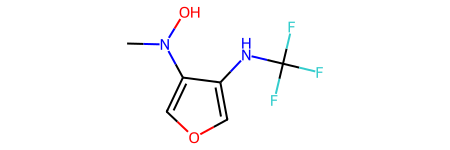

In [2]:
mol=Chem.MolFromSmiles("c1occ(NC(F)(F)F)c1N(O)C")
mol

In [3]:
# Counting Paths of length 2
from itertools import combinations
total=0
for middle_atom in mol.GetAtoms():
    print(middle_atom.GetSymbol())
    for begin_atom,end_atom in combinations(middle_atom.GetNeighbors(),2):
        print(begin_atom.GetSymbol(),middle_atom.GetSymbol(),end_atom.GetSymbol())
        total += 1 # 1/...
    print()
total

C
O C C

O
C O C

C
O C C

C
C C N
C C C
N C C

N
C N C

C
N C F
N C F
N C F
F C F
F C F
F C F

F

F

F

C
C C N
C C C
N C C

N
C N O
C N C
O N C

O

C



19

In [4]:
# Counting Paths of length 2
total2 = 0
total3=0
for a in mol.GetAtoms():
    for b in a.GetNeighbors():
        for c in b.GetNeighbors():
            if a.GetIdx()!=c.GetIdx(): # a!=c
                total2 += 1
            for d in c.GetNeighbors():
                if d.GetIdx() != b.GetIdx(): # d!=b
                    total3+=1
print(total2//2,total3//2)

19 38


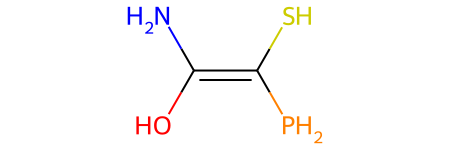

In [5]:
mol=Chem.MolFromSmiles("OC(N)=C(P)S")
mol

In [6]:
# Counting Paths of length 3
from itertools import combinations,product
total=0
for middle_bond in mol.GetBonds():
    left_middle_atom = middle_bond.GetBeginAtom()
    right_middle_atom = middle_bond.GetEndAtom()
    left_neighbors = [a for a in left_middle_atom.GetNeighbors() 
                      if a.GetIdx()!=right_middle_atom.GetIdx()]
    right_neighbors = [a for a in right_middle_atom.GetNeighbors() 
                      if a.GetIdx()!=left_middle_atom.GetIdx()]
    for left_atom,right_atom in product(left_neighbors,right_neighbors):
        total += 1 # 1/...
total

4

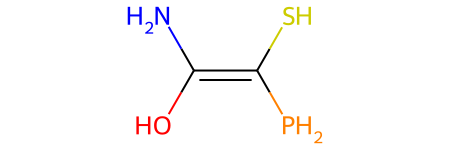

In [7]:
mol